# <center>Handwritten digits classification using neural network</center>

In [113]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [114]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [115]:
X_train=X_train/255
X_test=X_test/255

In [116]:
len(X_test)

10000

In [117]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

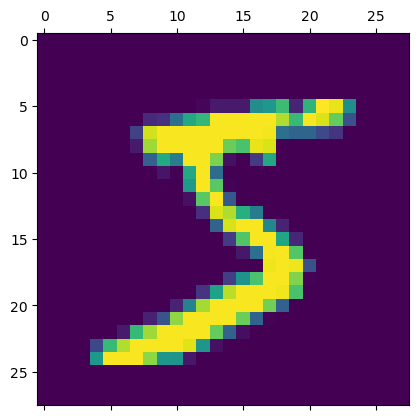

In [118]:
plt.matshow(X_train[0])

In [119]:
y_train[0]


5

In [120]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [121]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [122]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 669us/step - accuracy: 0.8161 - loss: 0.7177
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.9150 - loss: 0.3081
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.9213 - loss: 0.2815
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.9220 - loss: 0.2739
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.9266 - loss: 0.2647


In [123]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9132 - loss: 0.3021


[0.2675454914569855, 0.9247999787330627]

In [124]:
model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


array([[1.7853370e-02, 2.3993559e-07, 9.1718443e-02, ..., 9.9983889e-01,
        1.3509421e-01, 6.7477536e-01],
       [2.9151911e-01, 6.8384083e-03, 9.9934566e-01, ..., 1.8659093e-12,
        2.2335851e-01, 3.5564398e-09],
       [3.5056443e-04, 9.9341714e-01, 5.8196521e-01, ..., 1.3608485e-01,
        4.2132115e-01, 4.4005681e-02],
       ...,
       [2.6320326e-06, 3.5373073e-06, 1.2802066e-03, ..., 3.0592406e-01,
        6.2496310e-01, 7.5994623e-01],
       [7.9577876e-05, 1.4259575e-04, 1.3503448e-04, ..., 5.2412110e-05,
        7.0535886e-01, 1.1007697e-04],
       [7.1063940e-03, 4.7501886e-10, 2.3693696e-01, ..., 3.1251858e-08,
        5.3561281e-04, 1.2646846e-06]], dtype=float32)

In [125]:
y_predicted=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step


In [126]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [127]:
y_predicted[0]

array([1.7853370e-02, 2.3993559e-07, 9.1718443e-02, 9.4740784e-01,
       3.3652526e-03, 9.9702165e-02, 1.6676263e-06, 9.9983889e-01,
       1.3509421e-01, 6.7477536e-01], dtype=float32)

In [128]:
np.argmax(y_predicted[0])

7

In [129]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    1,    1,    5,    9,    4,    3,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,    9,  917,   19,    9,    3,   11,   10,   48,    3],
       [   1,    0,   16,  929,    0,   19,    2,   12,   24,    7],
       [   1,    1,    4,    1,  924,    0,   10,    4,   11,   26],
       [   7,    3,    1,   42,   10,  764,   14,    7,   37,    7],
       [   9,    3,    7,    1,    8,   15,  909,    2,    4,    0],
       [   1,    5,   23,    3,    7,    0,    0,  957,    4,   28],
       [   3,    8,    5,   19,    9,   22,    8,   12,  884,    4],
       [   8,    7,    2,   11,   35,    5,    0,   30,   11,  900]])>

Text(95.72222222222221, 0.5, 'Truth')

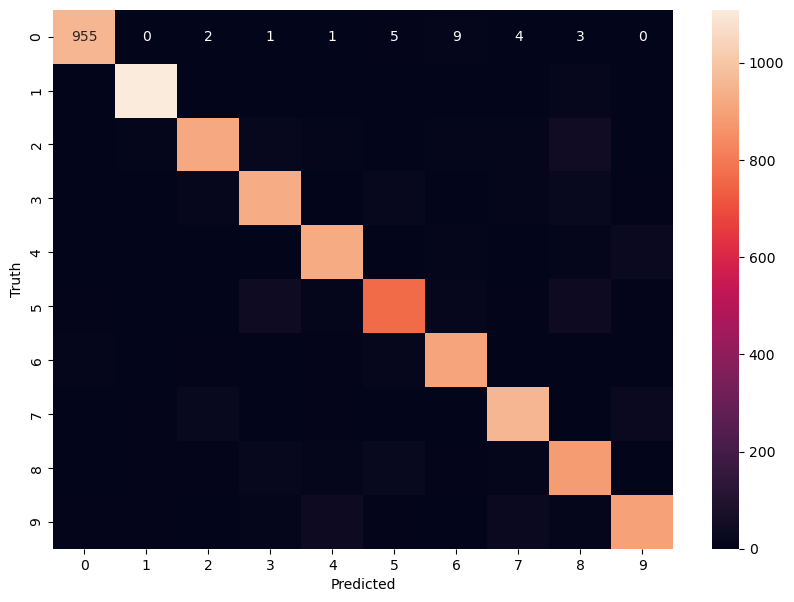

In [130]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using the hidden layer


In [131]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8696 - loss: 0.4583
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9624 - loss: 0.1278
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9751 - loss: 0.0837
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9823 - loss: 0.0610
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0478


In [132]:

model.evaluate(X_test_flattened,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9726 - loss: 0.0899


[0.07770992070436478, 0.9757999777793884]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step


Text(95.72222222222221, 0.5, 'Truth')

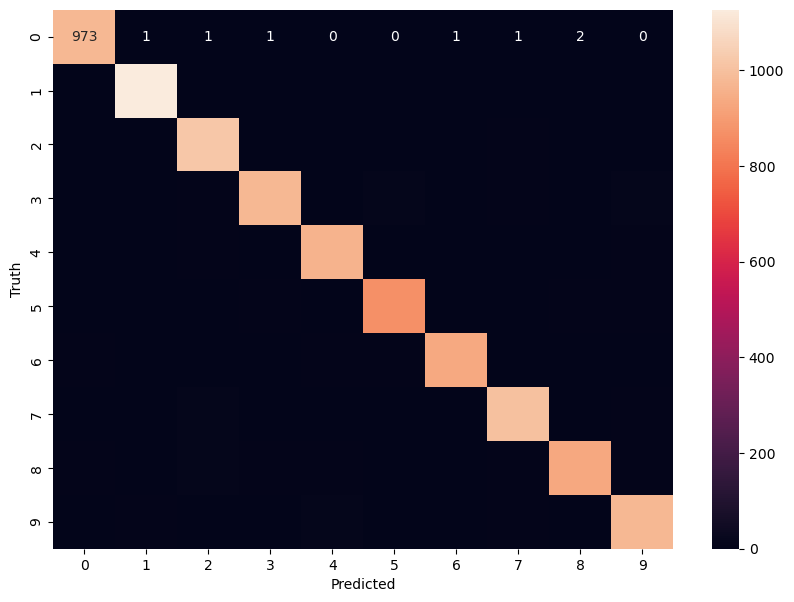

In [133]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')